# Week 5 Lab Report

## Introduction

**Background (<font color="red">Intro-Q1</font> - 2 pts)**: Provide 3-5 sentences of background and motivation for the analysis you are doing in the lab. e.g. What transcription factors are we looking at, why are those important?

There are 4 transcription factors (Oct4/Pou5f1, Sox2, cMyc, and Klf4) that were shown to make adult cells pluripotent when the cells were treated with them. We'd like to further analyse these TFs and see what they're regulating so we can study the mechanisms that cause adult cells to become pluripotent. We'll be looking at ChIP-seq data for 3 of these TFs (Oct4, Sox2, and Klf4) from embryonic mouse stem cells that are pluripotent and express the Yanamaka factors. We'll also be looking at H3K4me2 and H3K27ac, two histone modifications that mark regulatory regions since they'll likely play a role, along with the Yanamaka factors, in expressing pluripotency

**Summary of your findings (<font color="red">Intro-Q2</font> - 2 pts)**: Provide 3-5 sentences summarizing the datasets you analyzed and the findings of your analyses. For example: describe where the different transcription factors and histone modifications are binding and any interesting patterns you found in your motif analysis.

I looked at ChIP-seq data from the 3 TFs and 2 histones, as well as a WGE. I found that all components bound mostly in chromosome 17, and that there the peaks of the histones tended to correspond with TF peaks, but were much wider. We saw that the motifs of Oct4 and Sox2 were very similar, and we managed to tease out which peaks were specific to each TF. 

## Methods

**Dataset description (<font color="red">Methods-Q1</font> - 2 pts)**: Summarize the datasets we are starting with: what samples are we analyzing? Where did they come from? How many reads are there in each dataset, and what is the read length?

We're looking at fastq files for the 3 Yanamaka factors (Oct4, Sox2, and Klf4) and 2 histone modification (H3K4me2 and H3K27ac), which were gotten from ChIP-seq on mouse embryonic stem cells.

type: n_read = "wc -l type.fastq" / 4; read_length = -1 + "cat type.fastq | sed -n '2 p' | wc -c"

Oct4: n_read = 1999998; read_length = 50

Sox2: n_read = 1999998; read_length = 50

Klf4: n_read = 1999998; read_length = 50

H3K4me2: n_read = 1711167; read_length = 50

H3K27ac: n_read = 1999998; read_length = 50

**Alignment (<font color="red">Methods-Q2</font> - 2 pts)**: Summarize the methods you used to align the data. What aligner and version did you use? What build of the reference genome?

For each sample, I did a burrow-wheeler alignment (bwa version 0.7.17-r1198-dirty) using the "GRCm38" reference genome/build. 

**Peak calling (<font color="red">Methods-Q3</font> - 2 pts)**: Summarize the methods you used to call peaks for each sample the data. What tool(s) did you use? Did you use any non-default parameters? Did you use a different command for transcription factors vs. histone modifications?

I used Homer's 'findPeaks' tool (version unavailable) with an -i (input) directory that specified that whole genome extract control. I also used the -style parameter with value "factor" for TFs and "histone" for histone modifications. I also used -o to specify output location (non-important for computation)

**Annotating peak regions (<font color="red">Methods-Q4</font> - 3 pts)**: Summarize the methods you used to annotate peaks for each sample the data and visualize read counts around transcription start sites. What tool did you use? What reference genome and gene annotations? What library did you use for plotting your results?

I used Homer's annotatePeaks.pl with the GRCm38 reference genome build and build 75 annotations. I used matplotlib to plot results.

**Motif finding (<font color="red">Methods-Q5</font> - 3 pts)**: Summarize the methods you used to perform motif finding in each transcription factor. What tool did you use? Which version? Where did you get known motifs for comparison?

I used a Homer tool "findMotifsGenome.pl" (unknown version), and Homer gets the known motifs from the reference genome.

**Sox2 paek analysis (<font color="red">Methods-Q6</font> - 3 pts)**: Summarize the methods you used to analyze peaks specific to Sox2 (and not Oct4). What tools did you use? How did you extract Sox2-specific peaks?

I used mergePeaks and annotatePeaks to find the normalized expression of Sox2 and Oct4 on peaks, and then used pandas to select the peaks that were differentially expressed in Sox2. I then used the same tools as earlier to just look at selected peaks

**Oct4 motif occurrences (<font color="red">Methods-Q7</font> - 3 pts)**: Summarize the methods you used to scan chr17 for matches to the Oct4 motif and overlap with ChIP-seq peaks for Oct4.

I used fimo version 5.0.5 with default parameters to find regions where Oct4's motif was bound on Chr17. I then used intersectBed with the WGE bed files from earlier to see where the matches in Otc4's motif corresponded with peak in Chip-seq data.

## Results

**Alignment results (<font color="red">Results-Q1</font> - 2 pts)**: What percentage of reads from each experiment aligned to the reference genome?

Oct4 - 99.87%

Sox2 - 99.63%

Klf4 - 99.61%

H3K4me2 - 99.62%

H3K27ac - 99.72%

Control - 99.54%

**Description of ChIP-seq signals (<font color="red">Results-Q2</font> - 5 pts)**: Based on visual inspection of the datasets on IGV, where are the peaks for each of the datasets falling (promoters? gene regions? exons? elsewhere?). How do the signals for the transcripton factors (Oct4, Sox2, and Klf4) compare to the signals for the two histone modifications? What does the input signal look like? Include a screenshot of the IGV visualization in your report.

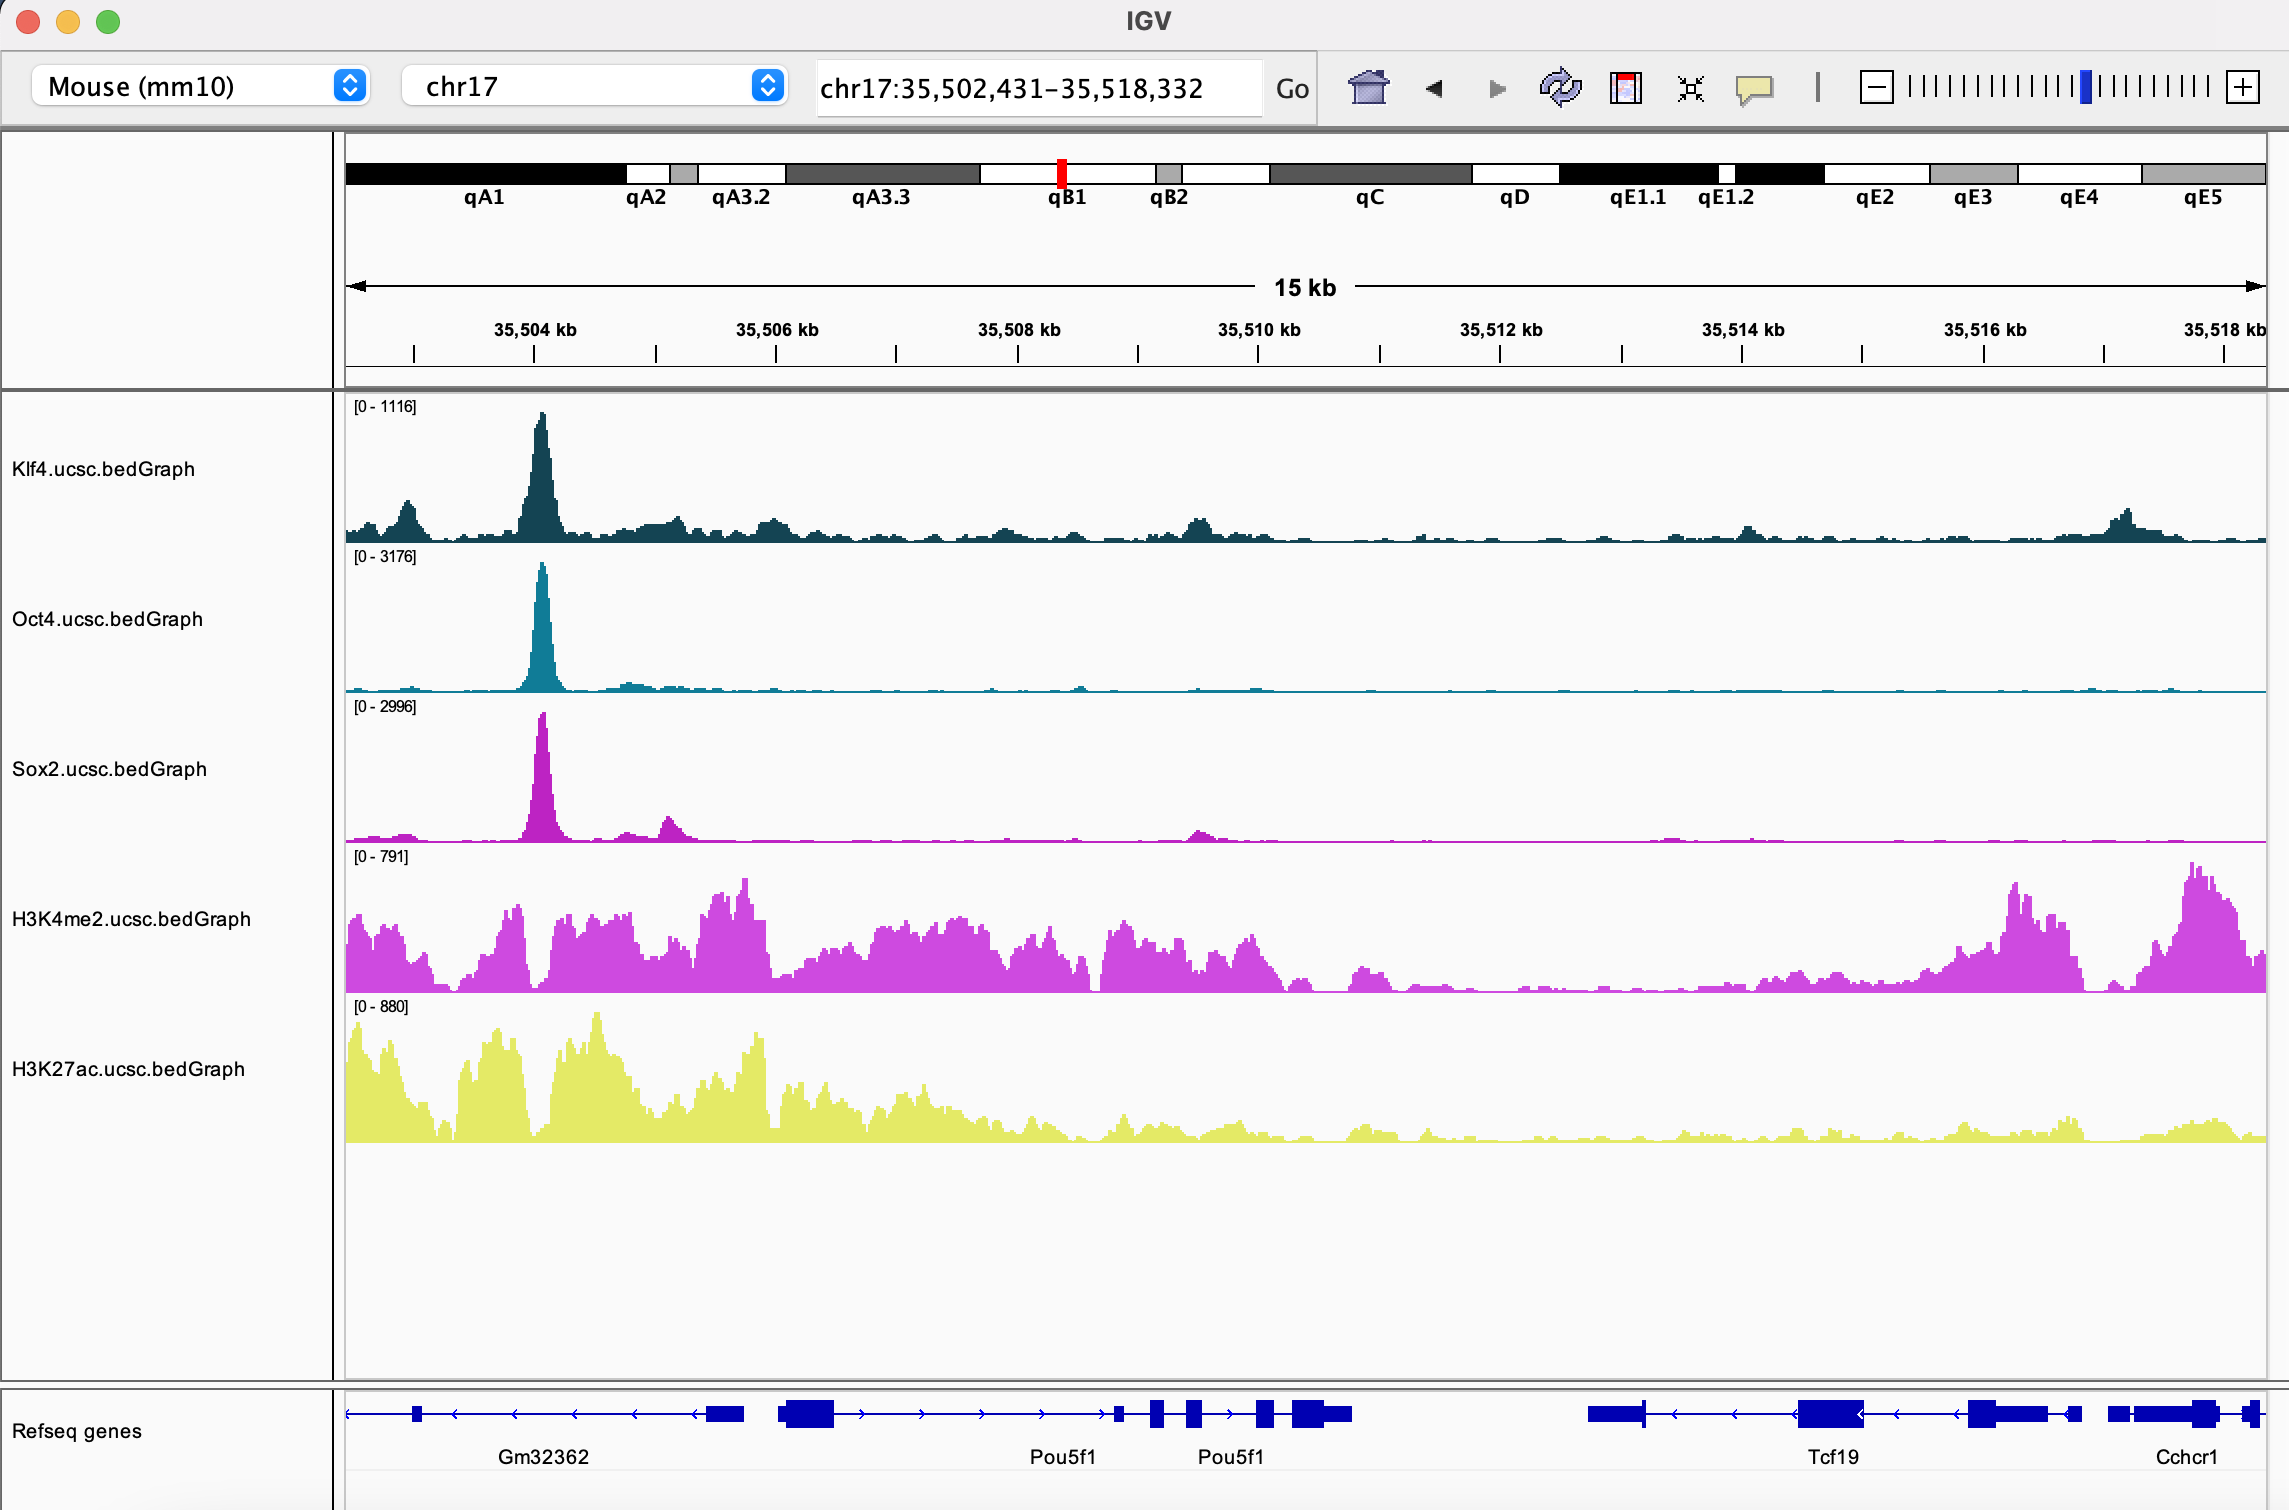

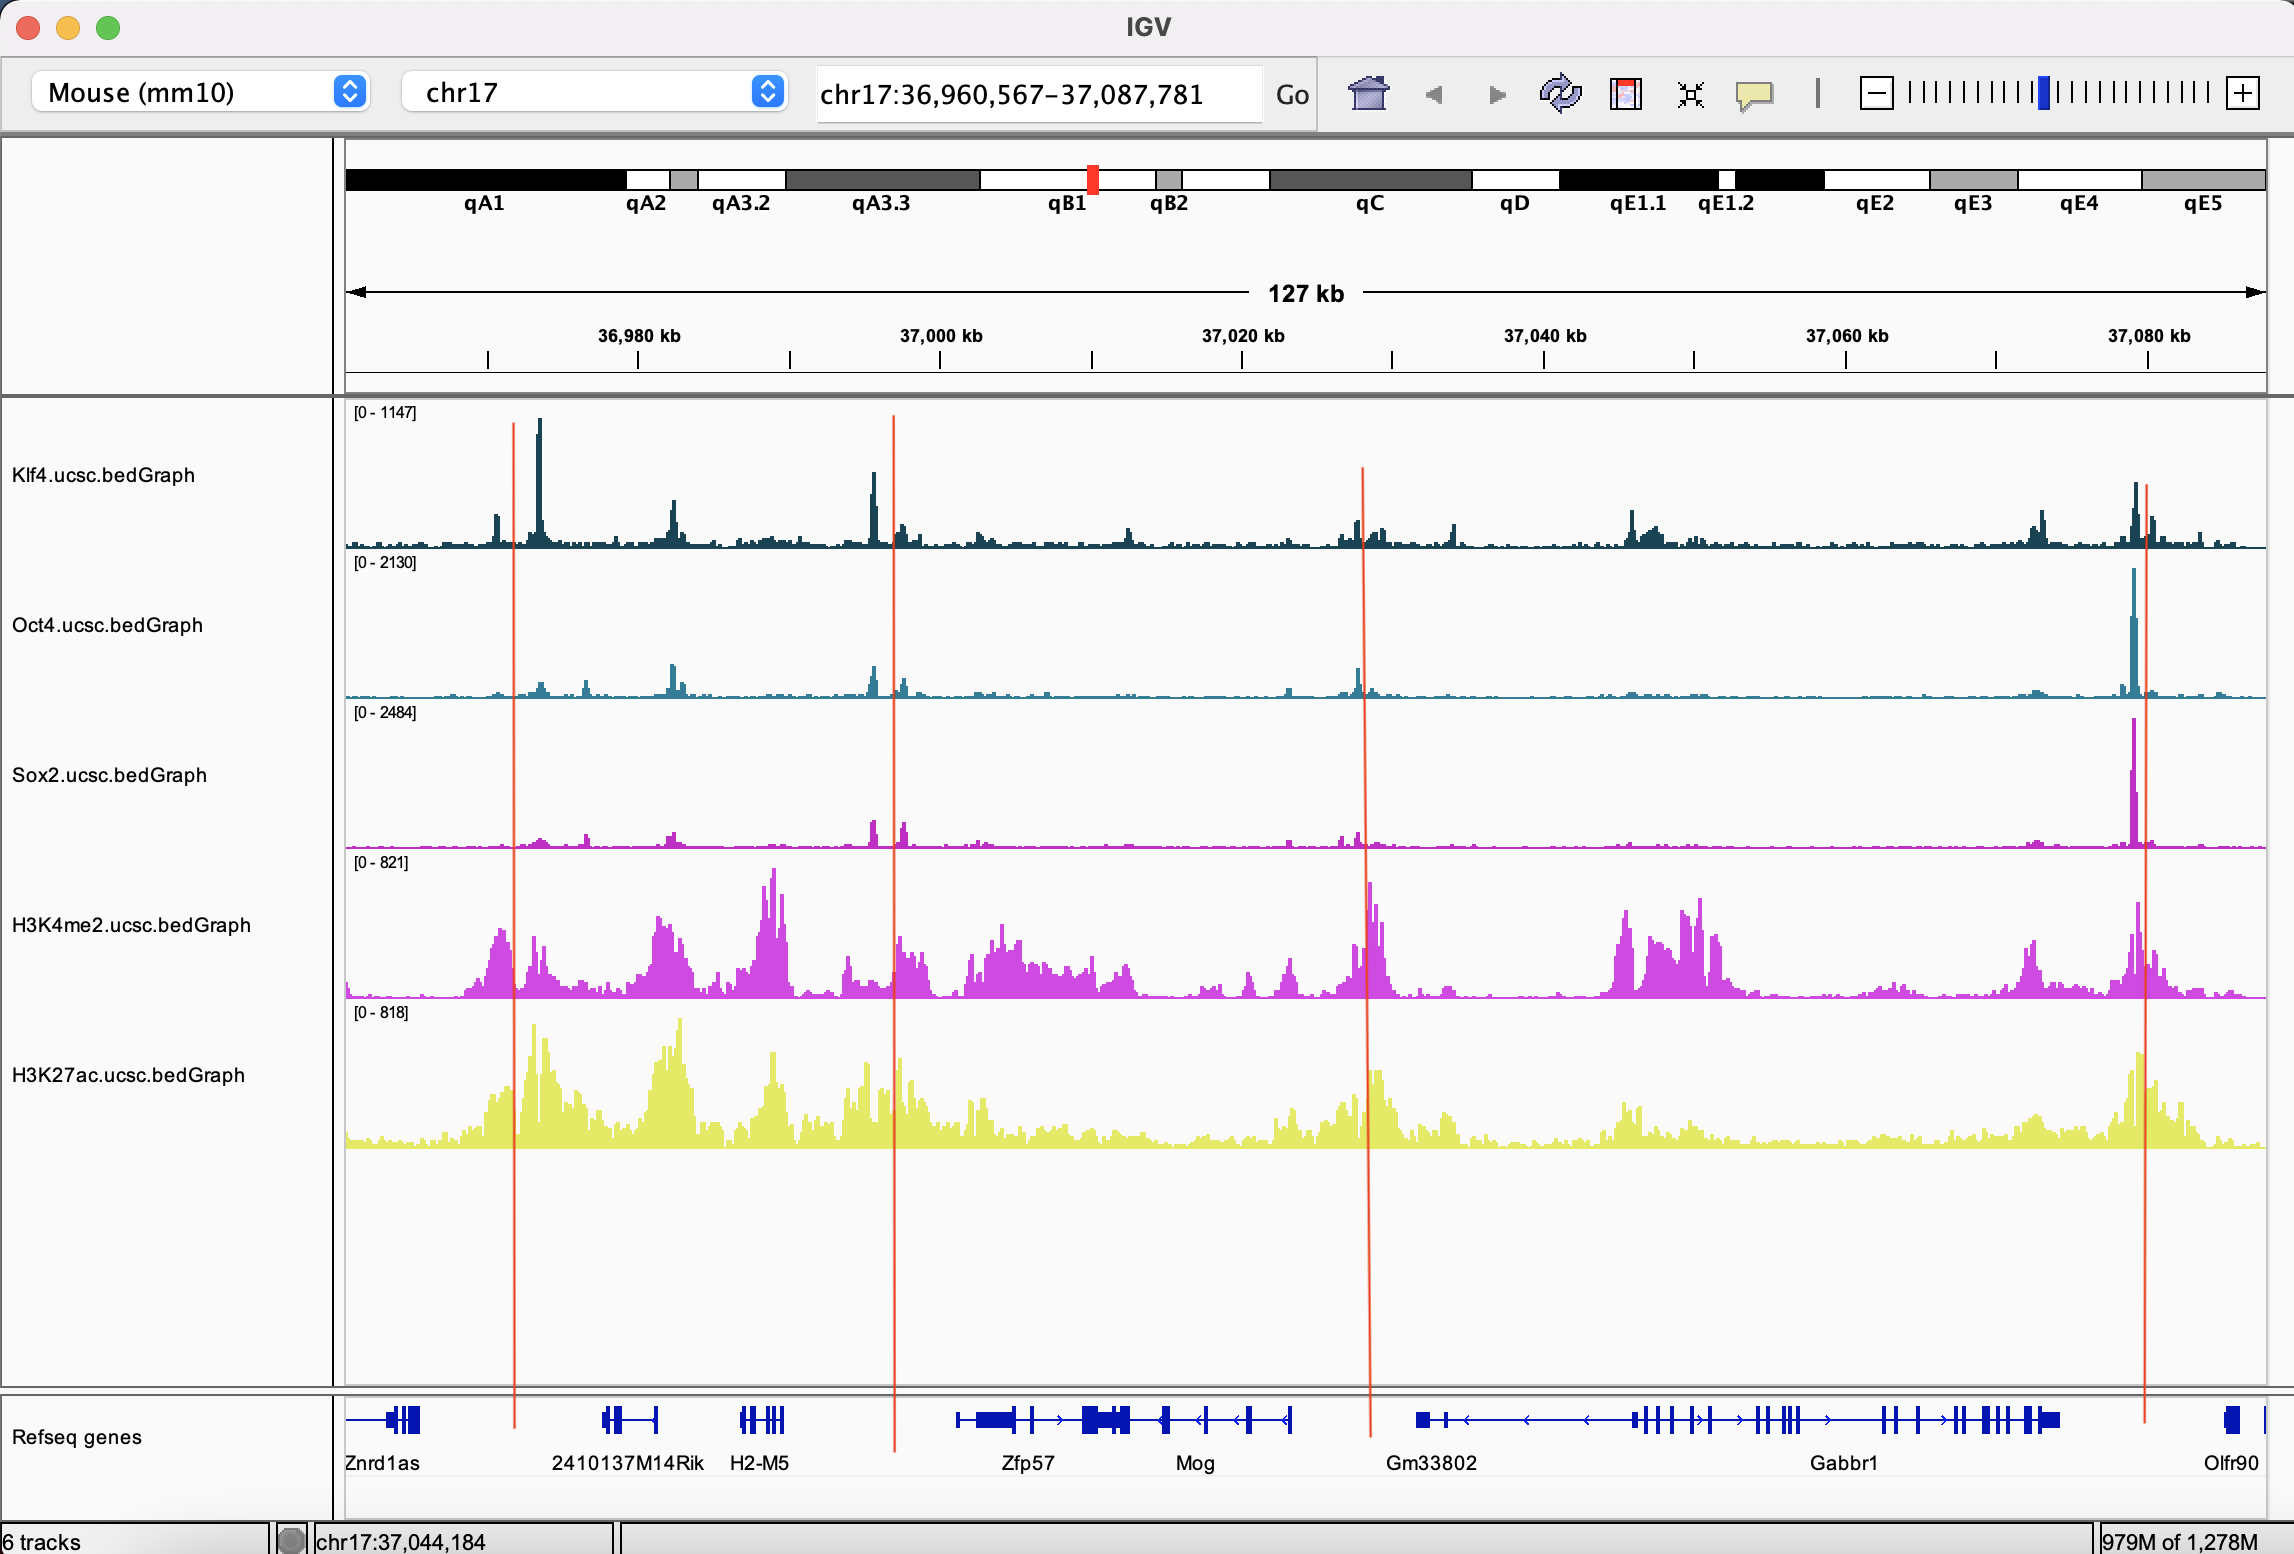

If above image doesn't show, I have a copy in ~/lab5-spring21/igv_screenshot.png

From the first image, the main observation that I've made is that the histone modifications make wide peaks in the same area as the spikes in our TFs. At the same time, however, the histone modifications dip at the moments when we see spikes in TF matches

From the second image, the main observation I made is that there tends to be spikes in TF activity in regions between genes (note that bottom shows reference gene locations and I drew the lines for clarity). The main shortcoming is that this image doesn't show if the TFs are appearing specifcally before some genes or after them.

**Peak calling (<font color="red">Results-Q3</font> - 4 pts)**: Summarize peak-finding results: what was the IP efficiency reported for each dataset? How many peaks did you find for each? What is the average peak size (length) for each? Note you should only have 5 peak sets, since you won't have peaks for the input control. You may present your results as a table.

Type: IP efficiency -- n_peaks -- avg_peak_length

Klf4: 3.12% -- 3020 -- 75

Oct4: 2.65% -- 2203 -- 75

Sox2: 2.74% -- 2236 -- 75

H3K4me2: 28.57% -- 2102 -- 500

H3K27ac: 70.02% -- 3060 -- 500

**Peak annotation (<font color="red">Results-Q4</font> - 5 pts)**: Generate a composite plot showing the distribution of all five datasets around TSSs. Be sure to label your axes and provide a legend or description of which color denotes which dataset. Plot transcription factors and histone modifications on separate plots to more easily see differences.

Populating the interactive namespace from numpy and matplotlib


,dist.from.tss,Oct4,Sox2,Klf4,H3K4me2,H3K27ac
0,-4000,0.894853,0.816687,0.929456,1.465848,1.165416
1,-3990,0.890395,0.807531,0.927906,1.467393,1.170515
2,-3980,0.881561,0.804261,0.920969,1.469015,1.171071
3,-3970,0.888774,0.802299,0.920071,1.469324,1.171164
4,-3960,0.882209,0.792080,0.915256,1.482844,1.179044


/opt/conda/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


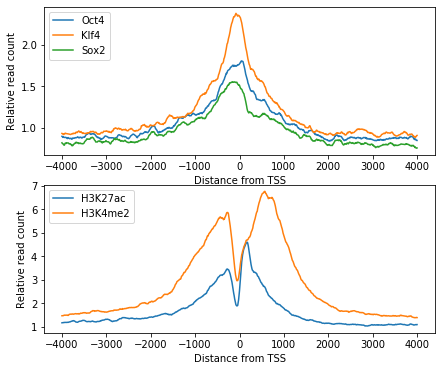

In [6]:
%pylab inline
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("~/week5/tss_histogram.txt", sep="\t")

# Reset column headers to make them easier to deal with
marks = ["Oct4","Sox2","Klf4","H3K4me2","H3K27ac"]

colnames = ["dist.from.tss"]
for m in marks: colnames.extend(["%s"%m,"%s:+"%m,"%s:-"%m])
data.columns = colnames
data = data[["dist.from.tss"]+marks]

# Peek at the dataframe
display(data.head())

fig = plt.figure()
fig.set_size_inches((7, 6))
ax = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
ax.plot(data["dist.from.tss"], data["Oct4"], label="Oct4");
ax.plot(data["dist.from.tss"], data["Klf4"], label="Klf4");
ax.plot(data["dist.from.tss"], data["Sox2"], label="Sox2");
ax2.plot(data["dist.from.tss"], data["H3K27ac"], label="H3K27ac");
ax2.plot(data["dist.from.tss"], data["H3K4me2"], label="H3K4me2");
ax.set_xlabel("Distance from TSS")
ax.set_ylabel("Relative read count")
ax.legend(loc="upper left");
ax2.set_xlabel("Distance from TSS")
ax2.set_ylabel("Relative read count")
ax2.legend(loc="upper left");

**Motif results (<font color="red">Results-Q5</font> - 8 pts)**: Which motifs did you find to be most enriched for each factor? Include a figure comparing the top motif logos you found compared to published logos for those factors. How similar are they?

Klf4 -- looks similar at a glance

From online database
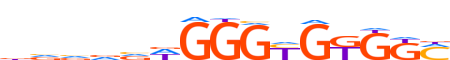

That I generated
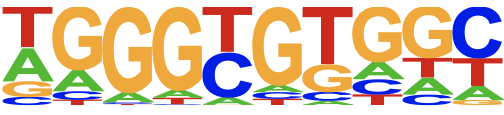

Oct4 -- looks similar at a glance

From online database


That I generated
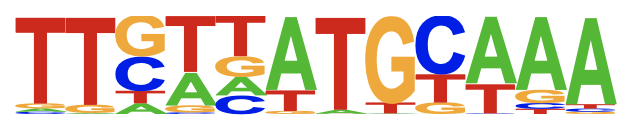

Sox2 -- looks similar at a glance

From online database


That I generated
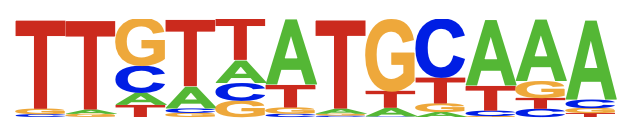

**Cooperative binding (<font color="red">Results-Q6</font> - 6 pts)**: Draw a scatter plot of Oct4 vs. Sox2 binding based on the output of `annotatePeaks.pl` on the merge dpeak set. Color points corresponding to peaks with more than two-fold higher binding in Sox2 vs. Oct4. 

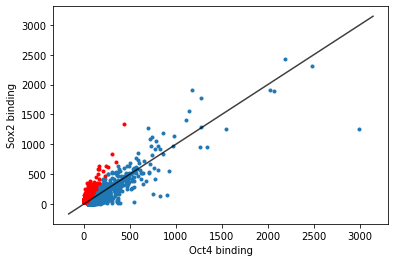

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("~/week5/oct4_sox2_scatter.txt", sep="\t")
df_sig = df[df.iloc[:,20]/2 > df.iloc[:,19]]
df = df[df.iloc[:,20]/2 <= df.iloc[:,19]]
Oct4 = df.iloc[:, 19]
Sox2 = df.iloc[:, 20]
Oct4_sig = df_sig.iloc[:, 19]
Sox2_sig = df_sig.iloc[:, 20]

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(Oct4, Sox2, marker=".")
ax.scatter(Oct4_sig, Sox2_sig, color="red", marker=".")
ax.set_xlabel("Oct4 binding")
ax.set_ylabel("Sox2 binding")
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]
ax.plot(lims, lims, 'k-', alpha=0.75) #got code for line from stackoverflow

**Cooperative binding (<font color="red">Results-Q7</font> - 8 pts)**: Repeat motif finding, but this time using only the peaks that were unique to Sox2 (fold change >2). Report the motif you found. Is this different than the motif you found when analyzing *all* Sox2 peaks? Does this match to published motifs for Sox2?

In [78]:
import pandas as pd
df = pd.read_csv("~/week5/oct4_sox2_scatter.txt", sep="\t")
Sox2_peaks = pd.read_csv("~/lab5-spring21/Sox2/peaks.txt", sep="\t", header=39)
df_sig = df[df.iloc[:,20]/2 > df.iloc[:,19]]
df_sig = df[["Chr","Start", "End"]]
df_sig.columns = ["chr","start", "end"]
new = pd.merge(Sox2_peaks, df_sig, how="left", left_on=["chr", "start", "end"], right_on=["chr", "start", "end"])
new.to_csv("new_Sox2_exclusive_peaks.txt", sep="\t")
new.head()

,#PeakID,chr,start,end,strand,Normalized Tag Count,focus ratio,findPeaks Score,Total Tags,Control Tags (normalized to IP Experiment),Fold Change vs Control,p-value vs Control,Fold Change vs Local,p-value vs Local,Clonal Fold Change
0,17-16,17,35504041,35504115,+,1991.0,0.834,77.0,342.0,8.0,42.84,0.000000e+00,35.43,0.000000e+00,0.97
1,17-12,17,15208248,15208322,+,1734.8,0.705,79.0,298.0,2.0,149.31,0.000000e+00,61.28,0.000000e+00,0.94
2,17-13,17,37079108,37079182,+,1653.3,0.658,78.0,287.0,8.0,35.95,0.000000e+00,41.01,0.000000e+00,0.95
3,17-29,17,29187360,29187434,+,1449.6,0.764,71.0,249.0,6.0,41.59,6.850000e-300,52.63,1.219996e-319,1.04
4,17-18,17,48616395,48616469,+,1432.1,0.708,76.0,251.0,1.0,251.52,0.000000e+00,50.17,2.870000e-308,0.95


I'm struggling to make this actually work ...

**Oct4 motif occurrences (<font color="red">Results-Q8</font> - 7 pts)**: How many instances of the Oct4 motif did you find on chr17? How many of those were actually bound (i.e. overlapped a peak in our ChIP-seq data?

I found 73474 instances of Oct4 motif on chr17, and 2322 were actually bound

## Discussion

**<font color="red">Discussion-Q1</font> - 3 pts**: You should find that two of the transcription factors have very similar motifs to each other. Which two? Read about these factors (e.g. wikipedia) and hypothesize why we found these factors binding to the same motif.

Oct4 and Sox2, a quick search says that both are important for self-renewal of stem cells, so they both likely bind to similar regions to make sure that a similar set of genes get expressed.

**<font color="red">Discussion-Q2</font> - 3 pts**: You likely noticed some key differences between how transcription factors and histone modifications bind close to TSSs (see Results-Q5 above). Why do you think one of them shows a significant dip in signal right on top of TSSs?

I think that histones had a dip in signal on top of TSSs because TFs and other cellular machinery that initiate transcription need that region to be unwound and open.

**<font color="red">Discussion-Q3</font> - 4 pts**: In your analysis of Oct4 motif occurrences on chr17, you likely found that there are many Oct4 motifs in the genome that are not actually bound by the Oct4 TF. Why do you think that is? Besides motif occurrence, what else do you think we could use to determine whether a TF is bound to a particular motif? (There are many possible answers).

There are plenty of regions in the genome that would happen to have that motif, but if they're wound up in some dense structure then Oct4 can't bind to it. One possible way to determine if a TF is bound is to a particular motif could be to mutate the motif in some part of a promotor for a gene with known function (and TF that binds) and see if the gene is still expressed.

## References

**References (<font color="red">References-Q1</font> - 3 pts)**: Provide at least 2 works that you cite in your report. For example, you will likely reference Homer and the paper by Chronis et al. where the data is taken from.

Homer:

Heinz S, Benner C, Spann N, Bertolino E et al. Simple Combinations of Lineage-Determining Transcription Factors Prime cis-Regulatory Elements Required for Macrophage and B Cell Identities. Mol Cell 2010 May 28;38(4):576-589. PMID: 20513432

Chronis et al. Cooperative Binding of Transcription Factors Orchestrates Reprogramming. Cell 2017 January 19; 3(168) 442-459.